In [1]:
from six.moves import cPickle
import os
import matplotlib.pyplot as plt
import numpy as np
import importlib
import utils as ut
from tqdm import tqdm
import mlp as mlp

Using TensorFlow backend.


# Exercise 1: Data Preprocessing

In [2]:
def normalize_data(X, mean, std):
    X -= np.outer(mean_X, np.ones(X.shape[1]))
    X /= np.outer(std_X, np.ones(X.shape[1]))
    return X
    
importlib.reload(ut)
X_train, y_train, Y_train = ut.loadData('data_batch_1', clipping=True)
X_val, y_val, Y_val = ut.loadData('data_batch_2', clipping=True)
X_test, y_test, Y_test = ut.loadData('test_batch', clipping=True)

## normalize with mean and std of train set 
mean_X = np.mean(X_train, axis=1)
std_X = np.std(X_train, axis=1)

X_train = normalize_data(X_train, mean_X, std_X)
X_val = normalize_data(X_val, mean_X, std_X)
X_test = normalize_data(X_test, mean_X, std_X)
data = {"X_train": X_train, "y_train": y_train, "Y_train": Y_train, "X_val":X_val, "y_val": y_val, "Y_val": Y_val}

In [3]:
importlib.reload(ut)
X_train_whole, y_train_whole, Y_train_whole = ut.loadData('data_batch_1', clipping=True)

for i in range(2,6):
    X, y, Y = ut.loadData('data_batch_'+str(i), clipping=True)
    X_train_whole = np.concatenate((X, X_train_whole), axis=1)
    y_train_whole = np.concatenate((y, y_train_whole))
    Y_train_whole = np.concatenate((Y, Y_train_whole), axis=1)

n_val = 5000

X_val_small, y_val_small, Y_val_small = X_train_whole[:,-n_val:], y_train_whole[-n_val:], Y_train_whole[:,-n_val:]
X_train_whole, y_train_whole, Y_train_whole = X_train_whole[:,:-n_val], y_train_whole[:-n_val], Y_train_whole[:,:-n_val]

## normalize with mean and std of train set 
mean = np.mean(X_train_whole, axis=1)
std = np.std(X_train_whole, axis=1)

X_train_whole = normalize_data(X_train_whole, mean, std)
X_val_small = normalize_data(X_val_small, mean, std)

data_whole = {"X_train": X_train_whole, "y_train": y_train_whole, "Y_train": Y_train_whole, "X_val":X_val_small, "y_val": y_val_small, "Y_val": Y_val_small}

In [4]:
importlib.reload(ut)
X_train_whole, y_train_whole, Y_train_whole = ut.loadData('data_batch_1', clipping=True)

for i in range(2,6):
    X, y, Y = ut.loadData('data_batch_'+str(i), clipping=True)
    X_train_whole = np.concatenate((X, X_train_whole), axis=1)
    y_train_whole = np.concatenate((y, y_train_whole))
    Y_train_whole = np.concatenate((Y, Y_train_whole), axis=1)

n_val = 1000

X_val_small, y_val_small, Y_val_small = X_train_whole[:,-n_val:], y_train_whole[-n_val:], Y_train_whole[:,-n_val:]
X_train_whole, y_train_whole, Y_train_whole = X_train_whole[:,:-n_val], y_train_whole[:-n_val], Y_train_whole[:,:-n_val]

## normalize with mean and std of train set 
mean = np.mean(X_train_whole, axis=1)
std = np.std(X_train_whole, axis=1)

X_train_whole = normalize_data(X_train_whole, mean, std)
X_val_small = normalize_data(X_val_small, mean, std)

data_best = {"X_train": X_train_whole, "y_train": y_train_whole, "Y_train": Y_train_whole, "X_val":X_val_small, "y_val": y_val_small, "Y_val": Y_val_small}

# Exercise 2: Compute the gradients for the network parameters
Check function step by step

In [5]:
importlib.reload(mlp)
net = mlp.MLP()
bs = 20
X, Y = X_train[:, :bs], Y_train[:, :bs]
P = net.forward_pass(X)
P.shape

(10, 20)

In [6]:
importlib.reload(mlp)
net = mlp.MLP(lamda=0.01)
bs = 20
X, Y = X_train[:, :bs], Y_train[:, :bs]
c = net.compute_cost(X, Y)
c

(2.6225131126746075, 3.2170252533911072)

In [7]:
importlib.reload(mlp)
net = mlp.MLP()
bs = 1
X, Y = X_train[:, :bs], Y_train[:, :bs]
P = net.forward_pass(X)
net.compute_gradients(X, Y, P)
net.update_parameters()

## Check the gradients 

In [8]:
importlib.reload(mlp)
bs, d = 1, 20
net = mlp.MLP(dims=[d, 50, 10])
X, Y = X_train[:d, :bs], Y_train[:d, :bs]
P = net.forward_pass(X)
net.compute_gradients(X, Y, P)

In [9]:
net.compare_gradients(X, Y, h=1e-5, eps=1e-6)

([6.842173318640139e-09, 2.486442854455087e-10],
 [1.6587616452790045e-10, 5.641024873722951e-11],
 [4.899544291336755e-12, 4.539913783449534e-12],
 [5.9559019782023934e-12, 9.097046727024605e-12])

In [10]:
batch_size = [1, 32, 64, 100]
lambdas = [0, 0.1, 1]

for l in lambdas:
    for bs in batch_size:
        X, Y = X_train[:d, :bs], Y_train[:d, :bs]
        net = mlp.MLP(dims=[d, 50, 10], lamda=l)
        P = net.forward_pass(X)
        net.compute_gradients(X, Y, P)
        rerr_w, rerr_b, aerr_w, aerr_b = net.compare_gradients(X, Y, h=1e-5, eps=1e-6)
        print(f'Batch size: {bs} - Lambda {l}->\n relative_error on gWs {rerr_w} \n relative_error on gbs {rerr_b} \n absolute error on gWs {aerr_w} \n absolute error on gbs {aerr_b}   ')

Batch size: 1 - Lambda 0->
 relative_error on gWs [6.842173318640139e-09, 2.486442854455087e-10] 
 relative_error on gbs [1.6587616452790045e-10, 5.641024873722951e-11] 
 absolute error on gWs [4.899544291336755e-12, 4.539913783449534e-12] 
 absolute error on gbs [5.9559019782023934e-12, 9.097046727024605e-12]   
Batch size: 32 - Lambda 0->
 relative_error on gWs [2.0380855471494506e-09, 1.0605938098343417e-09] 
 relative_error on gbs [1.727229349902716e-09, 1.0047600337423127e-10] 
 absolute error on gWs [1.197043817709317e-11, 1.1487676655470932e-11] 
 absolute error on gbs [1.3269654952218108e-11, 8.14658826508996e-12]   
Batch size: 64 - Lambda 0->
 relative_error on gWs [2.951357358503917e-09, 9.160325403474943e-10] 
 relative_error on gbs [1.9418877923014626e-09, 1.2109216928272436e-09] 
 absolute error on gWs [1.1537261077715457e-11, 1.0964820135997335e-11] 
 absolute error on gbs [1.0975728432669959e-11, 1.0094720567267735e-11]   
Batch size: 100 - Lambda 0->
 relative_error on

## Try to train the network with mini batch gd

In [12]:
importlib.reload(mlp)
net = mlp.MLP(lamda=0)
data_100 = {"X_train": X_train[:,:100], "y_train": y_train[:100], "Y_train": Y_train[:,:100], "X_val":X_val[:,:100], "y_val": y_val[:100], "Y_val": Y_val[:,:100]}
GDparams = {"n_batch":100, "n_epochs":200, "eta":1e-3, "exp":"test_grad"}
net.mini_batch_gd(data_100, GDparams, verbose=True, backup=True)

val_cost=2.341424768906559
 44%|████▍     | 89/200 [00:04<00:05, 20.97it/s]Epoch 84: train_acc=0.56 | val_acc=0.11 | train_loss=1.6695753636044282 | val_loss=2.3410634732754643 | train_cost=1.6695753636044282 | val_cost=2.3410634732754643
Epoch 85: train_acc=0.56 | val_acc=0.11 | train_loss=1.6637405929035536 | val_loss=2.3406739369301808 | train_cost=1.6637405929035536 | val_cost=2.3406739369301808
Epoch 86: train_acc=0.56 | val_acc=0.11 | train_loss=1.6578588482329395 | val_loss=2.3403827798223755 | train_cost=1.6578588482329395 | val_cost=2.3403827798223755
Epoch 87: train_acc=0.58 | val_acc=0.11 | train_loss=1.6520166560966851 | val_loss=2.339872211401996 | train_cost=1.6520166560966851 | val_cost=2.339872211401996
Epoch 88: train_acc=0.59 | val_acc=0.11 | train_loss=1.6462148155379928 | val_loss=2.3394486291941248 | train_cost=1.6462148155379928 | val_cost=2.3394486291941248
 48%|████▊     | 95/200 [00:04<00:04, 22.59it/s]Epoch 89: train_acc=0.61 | val_acc=0.11 | train_loss=1.6404

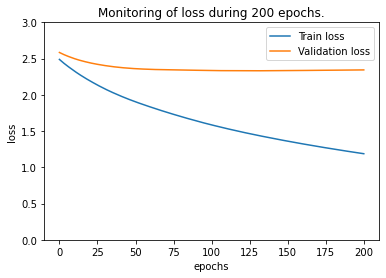

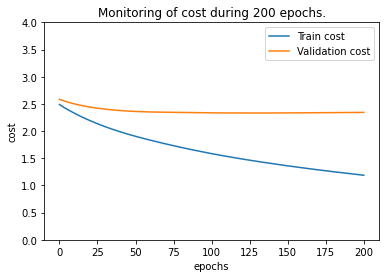

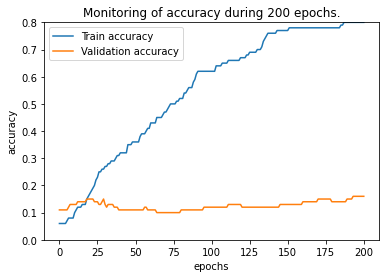

In [13]:
net.plot_metric(GDparams, metric="loss", cyclic=False)
net.plot_metric(GDparams, metric="cost", cyclic=False)
net.plot_metric(GDparams, metric="accuracy", cyclic=False)